# Modelos de Regresion lineal
## Modelo con datos simulados

Vamos a crear una distribución simulada de datos:

```latex notation````
\begin{equation}
y_e=\alpha+\beta x
\\ \text{Donde x son 100 valores distribuidos según una N(1.5, 2.5)}
\\y_e=5+1.9 x+\epsilon
\\ \text{Donde }\epsilon \text{ será el error y también estará distribuido como una normal pero de media 0 para no desplazar el modelo N(0, 0.8)}
\end{equation}



### Al lio
First, the libraries:

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image # para incluir imagenes local

Ahora creamos la sitribución aleatoria

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002080CD16A88>,
      dtype=object)

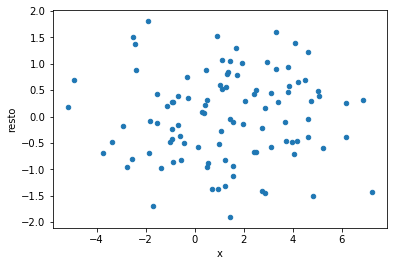

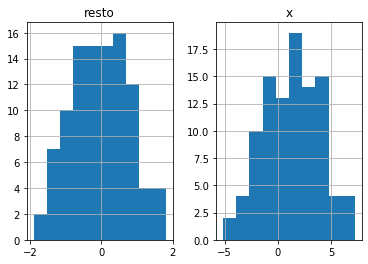

In [11]:
x = 1.5 + 2.5 * np.random.randn(100)
resto = 0 + 0.8 * np.random.randn(100)
df = pd.DataFrame({'x':x, 'resto':resto})
df.plot('x', 'resto', kind='scatter')
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208124B4F48>,
      dtype=object)

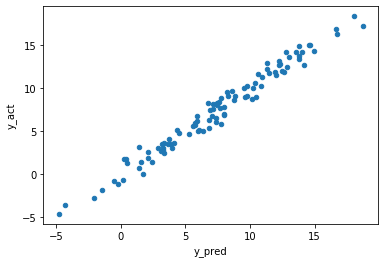

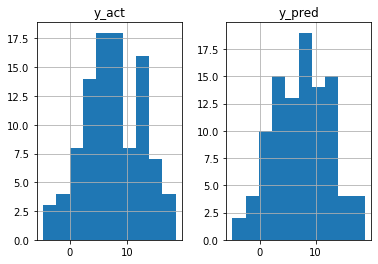

In [30]:

y_pred = 5 + 1.9*x
y_act =  5 + 1.9*x + resto
ydf = pd.DataFrame({'y_pred':y_pred, 'y_act':y_act})
ydf.plot ('y_pred',  'y_act', kind='scatter')
ydf.hist()

In [52]:
data = pd.DataFrame({
    "x":x,
    "y_act":y_act,
    "y_pred":y_pred
})

In [53]:
data.head()

,x,y_act,y_pred
0,3.711227,11.581401,12.051331
1,1.743420,9.094597,8.312498
2,1.115113,7.638794,7.118714
3,-0.670408,4.116049,3.726225
4,-0.450482,3.641758,4.144084


relleno un array igual de largo que el resto (100) con todos los datos la media de Y_act para pintarla

In [54]:
 
 y_mean = [np.mean(y_act) for i in range(0, len(y_act))]

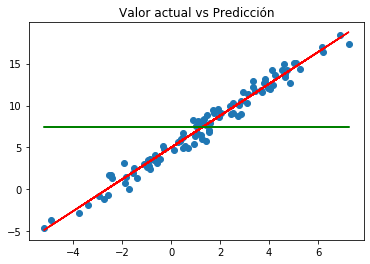

In [55]:
plt.plot(x, y_act, "o")
plt.plot(x, y_pred, color='red')
plt.plot(x,y_mean, "g")
plt.title ("Valor actual vs Predicción")
plt.show()

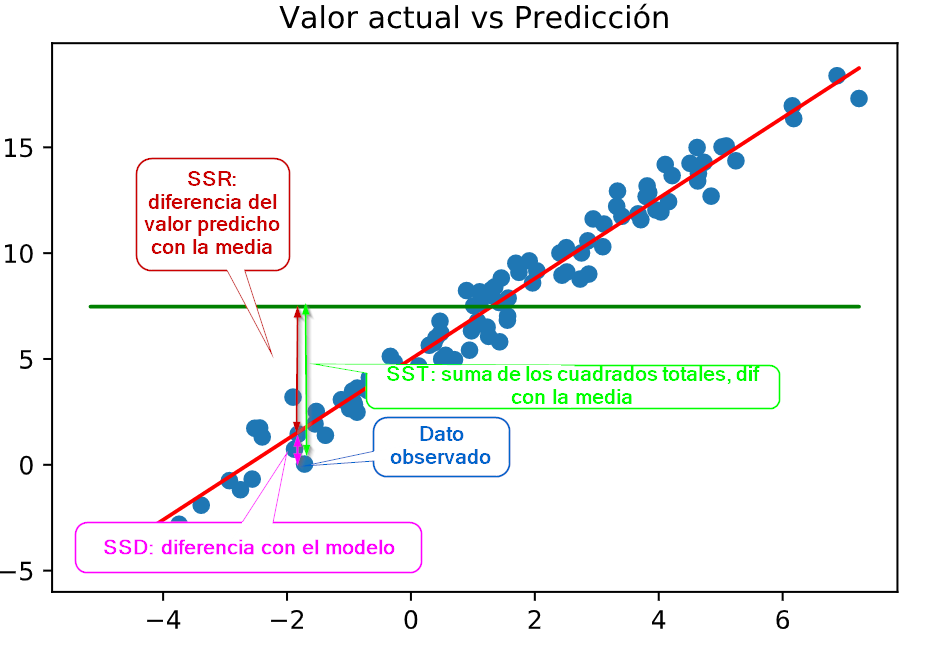

In [56]:
Image("./T4 - 1.png")

La suma de los cuadrados totales deberá coincidir con la suma de los cuadrados de la regresión mas la suma de los cuadrados de la diferencia con el modelo (epsilon, el dato aleatorio que no conocemos)

SST = SSR + SSD

R^2 = SSR/SST (entre 0 y 1) mide la bondad de la regresión lineal


In [58]:
data["SSR"] = (data["y_pred"]-np.mean(y_act))**2
data["SSD"] = (data["y_act"]-data["y_pred"])**2
data["SST"] = (data["y_act"]-np.mean(y_act))**2

In [59]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,3.711227,11.581401,12.051331,20.966650,0.220834,16.883923
1,1.743420,9.094597,8.312498,0.705771,0.611680,2.631538
2,1.115113,7.638794,7.118714,0.125091,0.270484,0.027689
3,-0.670408,4.116049,3.726225,14.033792,0.151963,11.265060
4,-0.450482,3.641758,4.144084,11.077659,0.252332,14.673787


In [60]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])
print ("R^2={}/{}={}".format(SSR, SST, SSR/SST))

R^2=2458.8185777222343/2543.2920992559475=0.9667857571065367


Ejercicio demostrar que SST = SSR + SSD

Vamos a demostrar formalmente la igualdad SST = SSR + SSD que hemos estado utilizando en la teoría de los vídeos anteriores.


Utilizando la notación del ejercicio anterior, es decir:

    y_i = el valor actual i-ésimo

    y_m = media de los valores actuales

    z_i = valor predictor i-ésimo (el que nos da la recta de regresión).

Podemos escribir

y_i - y_m = (y_i - z_i) + (z_i - y_m)

Y si ahora elevamos al cuadrado, y aplicamos la identidad notable obtenemos que :

(y_i - y_m) ^2 = (y_i - z_i) ^2 + (z_i-y_m) ^2 + 2(y_i-z_i)(z_i-y_m)

De aquí, aplicando sumatorio a cada uno de los factores anteriores se deduce que para demostrar que SST = SSR + SSD, tenemos que probar que:

sum(y_i-z_i)(z_i-y_m) = 0

Notemos que podemos obviar el 2 porque.

Para ello expresamos  (y_i-z_i)(z_i-y_m) de la siguiente forma:

(y_i-z_i)(z_i-y_m) =(y_i-z_i)z_i - (y_i-z_i)y_m

Ahora bien, en la demostración que  hicimos en el vídeo de la clase 74, la primera ecuación normal (en el minuto 5:26) vemos que:

sum(y_i-z_i)=0

Por lo tanto será suficiente ver que

sum(y_i-z_i)z_i = 0

Para ello, basta escribir que es z_i, no es otra cosa que:

z_i = a + bx_i

y si entonces sustituimos en la suma anterior y operamos, tenemos que:

sum(y_i-z_i)z_i = sum(y_i-z_i)a + bsum(y_i-z_i)x_i

De nuevo el primer sumatorio es cero por la primera ecuación. El segundo sumatorio también es cero por la segunda ecuación normal que aparece en el minuto 5:26 de vídeo.